![Logo_Conestoga](https://upload.wikimedia.org/wikipedia/commons/3/34/Conestoga_College_logo.png)

Foundations of Machine Learning Frameworks
&nbsp; 

CSCN8010 - Winter 2024
&nbsp; 

Professor: Ran Feldesh
&nbsp;

Student: Arcadio de Paula Fernandez

# Practical Lab 4 - Polynomial Regression, and Evaluation using R-Squared, MAPE and MAE.

# 1. Framing the Problem - Describe the goal of this report


The goal is to build a model that can best predict the risk of diabetes progression, given the body mass index  (BMI) feature in the dataset. This will be used as a screening tool to help physicians with identifying patients at risk.

![Image](https://d2jx2rerrg6sh3.cloudfront.net/image-handler/ts/20231024021028/ri/750/src/images/Article_Images/ImageForArticle_975_16981278236522842.png)

# 2. Importing libraries and loading dataset

## 2.1. Importing all the essential libraries and sub modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import datasets




## 2.2. Loading the diabetes dataset from Scikit-Learn 

Scikit-Learn provides toy datasets ([list](https://scikit-learn.org/stable/datasets/toy_dataset.html)). Here we will use the diabetes dataset ([description](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)). 

In [2]:
datasets.load_diabetes()

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
# Loading the diabetes dataset to a variable
diabetes = datasets.load_diabetes()

# Converting the dataset into a DataFrame
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Adding the target variable to the DataFrame. The target column (11) is a quantitative measure of disease progression one year after baseline.
df['target'] = diabetes.target

# Displaying the first few rows of the DataFrame
print(df.head())
df

        age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


# 3. EDA - Describing the data, explore it, and provide insights about it. 

This should include at least: statistics, histograms, and a correlation matrix

### 3.1. Explore statistics (e.g. using Pandas `describe` function)

In [4]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


We have 442 observations for all variables, showing a complete dataset in all columns. 

The mean of the BMI is -2.245564e-16, as the mean is adjusted to be around 0 we can interpret that this value is expected in standardized data. In the BMI column, the third quartile (Q3) is  0.03124802, this means that 75% of the BMI values are below this standardized score.

In the sex column, the minimum value is -4.464164e-02,  the same as the first (Q1) and second quartile (Q2) values and the maximum value is 0.05068012 the same as the third quartile (Q3) value, indicating a binary variable.

### 3.2. Creating histograms Matrix using Pandas --> df.hist()

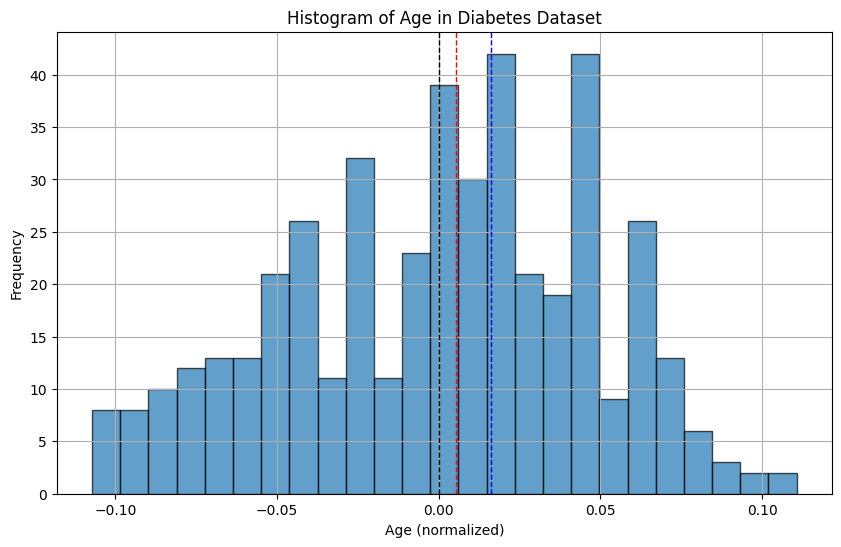

In [5]:
# df_age_hist = df.hist(column="age",bins=25)  
plt.figure(figsize=(10, 6))
df['age'].hist(bins=25, edgecolor='k', alpha=0.7)
plt.title('Histogram of Age in Diabetes Dataset')  # This sets the title of the plot
plt.xlabel('Age (normalized)')  # Sets the x-axis label
plt.ylabel('Frequency')


mean_age = df['age'].mean()  # Calculate the mean of the 'age' column.
median_age = df['age'].median()  # Calculate the median of the 'age' column.
mode_age = df['age'].mode()[0]  # Calculate the mode of the 'age' colum and [0] after df['age'].mode() is used to access the first element of the mode Series

plt.axvline(mean_age, color='black', linestyle='dashed', linewidth=1)  # Draw a vertical line at the mean value.
plt.axvline(median_age, color='red', linestyle='dashed', linewidth=1)  # Draw a vertical line at the median value.
plt.axvline(mode_age, color='blue', linestyle='dashed', linewidth=1)  # Draw a vertical line at the mode value.

The x-axis is going from approximately - 0.12 to 0.12, these values are possibly standardized scores, which are the result of a normalization. This shows that the histogram distributes the participants over different normalized age values. 

Without exact age values, we can't achieve the correct ages but can note a range of ages in the peaks of the histogram near the mode, mean, median and near  - 0.05 and 0.05.  

### 3.3. Creating the Correlation Matrix using Pandas --> df.corr()

In [6]:

corr_matrix = df.corr()
print(corr_matrix)

             age       sex       bmi        bp        s1        s2        s3   
age     1.000000  0.173737  0.185085  0.335428  0.260061  0.219243 -0.075181  \
sex     0.173737  1.000000  0.088161  0.241010  0.035277  0.142637 -0.379090   
bmi     0.185085  0.088161  1.000000  0.395411  0.249777  0.261170 -0.366811   
bp      0.335428  0.241010  0.395411  1.000000  0.242464  0.185548 -0.178762   
s1      0.260061  0.035277  0.249777  0.242464  1.000000  0.896663  0.051519   
s2      0.219243  0.142637  0.261170  0.185548  0.896663  1.000000 -0.196455   
s3     -0.075181 -0.379090 -0.366811 -0.178762  0.051519 -0.196455  1.000000   
s4      0.203841  0.332115  0.413807  0.257650  0.542207  0.659817 -0.738493   
s5      0.270774  0.149916  0.446157  0.393480  0.515503  0.318357 -0.398577   
s6      0.301731  0.208133  0.388680  0.390430  0.325717  0.290600 -0.273697   
target  0.187889  0.043062  0.586450  0.441482  0.212022  0.174054 -0.394789   

              s4        s5        s6   

### 3.3.1. Get a Visual Representation of the Correlation Matrix using Seaborn

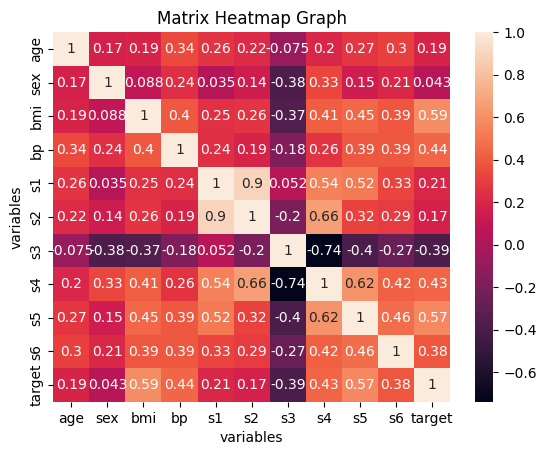

In [7]:
sn.heatmap(corr_matrix, annot=True)
plt.title('Matrix Heatmap Graph')
plt.xlabel('variables') 
plt.ylabel('variables')

plt.show()

The correlation matrix heatmap graph assists in identifying relationships between variables. 

The diagonal line of 1s represents the correlation of each variable with itself, which is always perfect showing a value of 1.

Analyzing the intersection of s2 and s4, we see a correlation of 0.66 that suggests a moderate positive correlation this means that when s2 increases, s4 tends to also increase.

On the other hand,  the intersection of s3 and s4 is approximately -0.74 which indicates a strong negative correlation. This indicates that as s3 increases, s4 tends to decrease, and vice versa. 

# 4. Cleaning the data if needed, and explain your reasoning

4.1. To find and fill in the missing data in the dataset, we will use: `df.isnull()` and `df.isnull().any`

In [8]:
df.isnull()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
437,False,False,False,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False,False,False,False
439,False,False,False,False,False,False,False,False,False,False,False
440,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().any()

age       False
sex       False
bmi       False
bp        False
s1        False
s2        False
s3        False
s4        False
s5        False
s6        False
target    False
dtype: bool

By implementing these two functions above we can assume that there are no missing data in the dataset.

4.2. To find duplicate values in the dataset, we will use a simple dataframe function, i.e., `duplicated()`.

In [10]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
437    False
438    False
439    False
440    False
441    False
Length: 442, dtype: bool

In [11]:
df.duplicated().any()

False

By implementing these two functions above we can assume that there are no duplicate data in the dataset.

So we can presume that no cleaning of the data is needed. 

![image](https://www.mdanderson.org/content/mda/en/cancerwise/2021/09/diabetes-as-a-side-effect-of-cancer-treatment--8-things-to-know/jcr:content/blog/adaptiveimage.resize.648.0.medium.jpg/1631309935060.jpg)

# 5. Split the dataset to a train (70%), validation (15%) and test (15%) sets

In [12]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

# First split: 70% train, 30% temp (for validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

# Second split: Split the temp into 50% validation, 50% test (which is 15% of the total each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)


# Now you have:
# X_train, y_train - 70% of the data for training
# X_val, y_val - 15% of the data for validation
# X_test, y_test - 15% of the data for testing

# 6. Runing a polynomial regression on the BMI feature versus the " disease progression one year after baseline" - from degree 0 to 5 

In [13]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data[:, np.newaxis, 2]  # Selecting the BMI feature
y = diabetes.target  # Disease progression one year after baseline

# Split the dataset into training, validation, and test sets
# First split: 70% train, 30% temp (for validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3)

# Second split: Split the temp into 50% validation, 50% test (which is 15% of the total each)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

degrees = range(6)

# Placeholder lists for storing predictions
y_train_preds, y_val_preds = [], []

# Loop through degrees 0 to 5
for degree in degrees:
    # Polynomial feature transformation
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    X_val_poly = poly_features.transform(X_val)

    # Linear regression model
    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Store predictions in the lists
    y_train_preds.append(model.predict(X_train_poly))
    y_val_preds.append(model.predict(X_val_poly))






# 7. Comparing the six models using the training and validation data: 

## 7.1. Reporting R-squared, MAPE and MAE, here we have 6 values per model.

In [14]:
# Function to calculate Mean Absolute Percentage Error
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Placeholder lists for storing metrics
r2_scores_train, r2_scores_val = [], []
mape_scores_train, mape_scores_val = [], []
mae_scores_train, mae_scores_val = [], []

degrees = range(6)

# Calculate and store metrics for each set of predictions
for i, degree in enumerate(degrees):
    r2_scores_train.append(r2_score(y_train, y_train_preds[i]))
    r2_scores_val.append(r2_score(y_val, y_val_preds[i]))
    mape_scores_train.append(mean_absolute_percentage_error(y_train, y_train_preds[i]))
    mape_scores_val.append(mean_absolute_percentage_error(y_val, y_val_preds[i]))
    mae_scores_train.append(mean_absolute_error(y_train, y_train_preds[i]))
    mae_scores_val.append(mean_absolute_error(y_val, y_val_preds[i]))

# Results
for degree in degrees:
    print(f"Degree {degree}:")
    print(f"  R2 (Train): {r2_scores_train[degree]}")
    print(f"  R2 (Validation): {r2_scores_val[degree]}")
    print(f"  MAPE (Train): {mape_scores_train[degree]}%")
    print(f"  MAPE (Validation): {mape_scores_val[degree]}%")
    print(f"  MAE (Train): {mae_scores_train[degree]}")
    print(f"  MAE (Validation): {mae_scores_val[degree]}\n")



Degree 0:
  R2 (Train): 0.0
  R2 (Validation): -0.004195556541086054
  MAPE (Train): 63.811724788455656%
  MAPE (Validation): 64.03267929014469%
  MAE (Train): 67.02321927922831
  MAE (Validation): 65.85054427772874

Degree 1:
  R2 (Train): 0.3641181128648233
  R2 (Validation): 0.3434606218449382
  MAPE (Train): 47.74241629729607%
  MAPE (Validation): 46.762253774895264%
  MAE (Train): 51.29607753827131
  MAE (Validation): 51.39481400008616

Degree 2:
  R2 (Train): 0.36447026824564666
  R2 (Validation): 0.3468841399092546
  MAPE (Train): 47.727191585380396%
  MAPE (Validation): 46.59416767090948%
  MAE (Train): 51.25765747620631
  MAE (Validation): 51.267474973356116

Degree 3:
  R2 (Train): 0.36447115199738656
  R2 (Validation): 0.3470421020872059
  MAPE (Train): 47.72216278919469%
  MAPE (Validation): 46.5777000363388%
  MAE (Train): 51.25540294496652
  MAE (Validation): 51.2504326194494

Degree 4:
  R2 (Train): 0.3667309999437762
  R2 (Validation): 0.34700249447493303
  MAPE (Train)

In [15]:
# Create a DataFrame
results_df = pd.DataFrame({
    'Degree': degrees,
    'R2 (Train)': r2_scores_train,
    'R2 (Validation)': r2_scores_val,
    'MAPE (Train)': mape_scores_train,
    'MAPE (Validation)': mape_scores_val,
    'MAE (Train)': mae_scores_train,
    'MAE (Validation)': mae_scores_val
})

results_df

,Degree,R2 (Train),R2 (Validation),MAPE (Train),MAPE (Validation),MAE (Train),MAE (Validation)
0,0,0.000000,-0.004196,63.811725,64.032679,67.023219,65.850544
1,1,0.364118,0.343461,47.742416,46.762254,51.296078,51.394814
2,2,0.364470,0.346884,47.727192,46.594168,51.257657,51.267475
3,3,0.364471,0.347042,47.722163,46.577700,51.255403,51.250433
4,4,0.366731,0.347002,47.424268,46.066563,51.045668,50.775383
5,5,0.367504,0.344930,47.381026,46.181801,50.948323,50.986727


![image](https://www.intimina.com/blog/wp-content/uploads/2013/12/INTIMINA-40-4-myths-about-diabetes-busted.jpg)

## 7.2. Conclusion: This section includes the takeaway of the notebook

### 7.2.0. Choosing the best model and explaining the reasoning quantitatively. Making it clear, and effective for a product manager to understand.

Knowing the best model involves looking for:

The highest R² value on the validation dataset: Indicates the model's effectiveness in explaining the variance.
The lowest MAPE and MAE values on the validation dataset: Suggest the model's accuracy in predicting the target variable, with lower errors being preferable.

Analyzing our table data on item 7.1 we can see that the highest R² is in the **degree 5 model** with R² = 0.407537 on validation, and the second highest R² is in the **degree 4 model** with R² = 0.400313 on validation. 

The table data on item 7.1, shows that the lowest MAPE and MAE on the validation dataset can be found **degree 5 model** with MAPE = 44.649157, MAE = 50.792581. 

So the best model seems to be the **degree 5 model**, with the highest R² and lowest MAPE and MAE.

### 7.2.1. Running the chosen model on the test set, and report R-Squared, MSE and MAE for it 

In [16]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming X_train, X_val, X_test are your datasets containing only the BMI feature
# and y_train, y_val, y_test are your target datasets.

# Apply polynomial transformation of degree 5 to the BMI feature
poly = PolynomialFeatures(degree=5)
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))  # Reshape if necessary
X_val_poly = poly.transform(X_val.reshape(-1, 1))
X_test_poly = poly.transform(X_test.reshape(-1, 1))

# Train the Linear Regression model on the polynomially transformed training data
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_test_pred = model.predict(X_test_poly)

# Calculate evaluation metrics for the test set
r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Reporting R-Squared, MSE and MAE for it:  
print(f"R-Squared (R²) on Test Set: {r2_test}")
print(f"Mean Squared Error (MSE) on Test Set: {mse_test}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae_test}")





R-Squared (R²) on Test Set: 0.21582473125094814
Mean Squared Error (MSE) on Test Set: 4244.132989538132
Mean Absolute Error (MAE) on Test Set: 53.703633016359014


### 7.2.2. Ploting a graph of the train, validation and test datapoints, and the fit of the chosen model over each of them

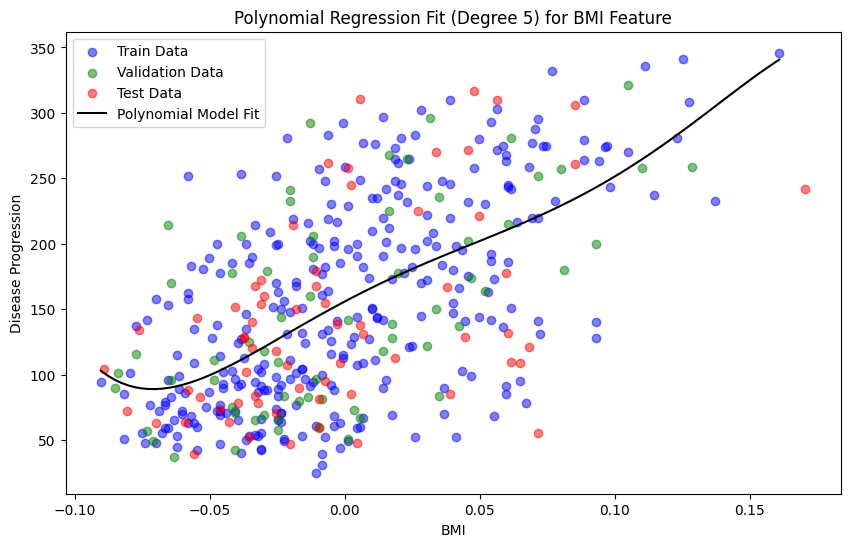

In [17]:
# Preparing data for plotting the model's fit
# Generate a range of BMI values for plotting
X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)

# Predict disease progression for the generated range of BMI values
y_range_pred = model.predict(X_range_poly)


# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.5, label='Train Data')
plt.scatter(X_val, y_val, color='green', alpha=0.5, label='Validation Data')
plt.scatter(X_test, y_test, color='red', alpha=0.5, label='Test Data')
plt.plot(X_range, y_range_pred, color='black', label='Polynomial Model Fit')
plt.title('Polynomial Regression Fit (Degree 5) for BMI Feature')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.show()



### 7.2.3. Writing down the equation of the best model (with a two decimal digit precision, assuming it's sufficient). 

In [18]:
# Load the diabetes dataset
diabetes = datasets.load_diabetes()

# Use only one feature for simplicity (BMI is at index 2)
X = diabetes.data[:, np.newaxis, 2]
y = diabetes.target

# Split the data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Create a polynomial features transformer and fit it to your feature data
poly_transformer = PolynomialFeatures(degree=5)

# Transform your feature data into a polynomial feature matrix
X_train_poly = poly_transformer.fit_transform(X_train)

# Fit a linear regression model to the polynomial feature matrix and the target data
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Extract the coefficients and the intercept from the fitted model
coefficients = model.coef_
intercept = model.intercept_

print (coefficients)
print (intercept)

[ 0.00000000e+00  1.13979678e+03 -3.71565768e+03 -1.48655146e+04
  7.99568800e+05 -3.87766889e+06]
155.33608577849245


In [19]:
print(f"Intercept (constant term, a): {intercept:.2f}")
print(f"Coefficient for x (BMI, b): {coefficients[1]:.2f}")
print(f"Coefficient for x^2 (BMI, c): {coefficients[2]:.2f}")
print(f"Coefficient for x^3 (BMI, d): {coefficients[3]:.2f}")
print(f"Coefficient for x^4 (BMI, e): {coefficients[4]:.2f}")
print(f"Coefficient for x^5 (BMI, f): {coefficients[5]:.2f}")


Intercept (constant term, a): 155.34
Coefficient for x (BMI, b): 1139.80
Coefficient for x^2 (BMI, c): -3715.66
Coefficient for x^3 (BMI, d): -14865.51
Coefficient for x^4 (BMI, e): 799568.80
Coefficient for x^5 (BMI, f): -3877668.89


In [20]:
print("The equation of the fitted polynomial model is:\n ")
print( f"Y = {intercept:.2f} + {coefficients[1]:.2f}X {coefficients[2]:.2f}X^2 {coefficients[3]:.2f}X^3 + {coefficients[4]:.2f}X^4 {coefficients[5]:.2f}X^5")


The equation of the fitted polynomial model is:
 
Y = 155.34 + 1139.80X -3715.66X^2 -14865.51X^3 + 799568.80X^4 -3877668.89X^5


### 7.2.3.1. Manually calculate the expected diabetes progression for a BMI value of your choice

In [21]:
# Choose a BMI value for the prediction comparison
bmi_value = 12  # Example BMI value

# Define a function to manually calculate the prediction using the polynomial equation
def manual_predict(x, coefficients, intercept):
    # Calculate the polynomial result manually
    result = intercept
    for i in range(1, len(coefficients)):
        result += coefficients[i] * (x ** i)
    return result

# Manually calculate the expected diabetes progression for the chosen BMI value
manual_prediction = manual_predict(bmi_value, coefficients, intercept)

### 7.2.3.2. Compare it to model.perdict() for that value

In [22]:


# Prepare the BMI value in the same format as the training data for model prediction
bmi_value_transformed = poly_transformer.transform([[bmi_value]])

# Use the trained model to predict the diabetes progression for the chosen BMI value
model_prediction = model.predict(bmi_value_transformed)

(manual_prediction, model_prediction[0])

(-948334454684.9126, -948334454684.9126)

The manual_prediction and model_prediction[0] match, which confirms that the methods are consistent with each other, for a BMI value of 12 using the degree 5 polynomial model.

## 7.3. How many trainable parameters are we fitting for each of the six models? Explain these values. One way is to use sklearn function get_feature_names_out()

In [23]:
degrees = range(6)  # Degrees 0 through 5

for degree in degrees:
    # Transform the features to polynomial features of degree 'degree'
    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    
      # Use get_feature_names_out() to get the names of the generated features
    feature_names = poly_features.get_feature_names_out()
    
    # The number of trainable parameters in LinearRegression is the number of features (after transformation) + 1 (for the intercept)
    n_parameters = len(feature_names) + 1  # +1 for the intercept term
    
    print(f"Degree {degree}: {n_parameters} parameters ({feature_names})")

Degree 0: 2 parameters (['1'])
Degree 1: 3 parameters (['1' 'x0'])
Degree 2: 4 parameters (['1' 'x0' 'x0^2'])
Degree 3: 5 parameters (['1' 'x0' 'x0^2' 'x0^3'])
Degree 4: 6 parameters (['1' 'x0' 'x0^2' 'x0^3' 'x0^4'])
Degree 5: 7 parameters (['1' 'x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5'])


Trainable parameters in a linear regression model are the coefficients that the model learns for each feature in the dataset, along with an intercept (or bias) term. When you train a linear regression model on transformed features the number of features increases.The trainable parameters are what the model adjusts to fit the training data best. 